# Dataset Analysis

### Metrics to be analyzed

- Nr. of sentences per case
- Number of words
- Most common words/bigrams

Optional:
- vocabulary size (unique words)
- NER entity counts

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Chloe\\Documents\\MaastrichtLaw&Tech\\Thesis\\MscThesis\\Dataset\\Metadata\\subset.csv')

In [3]:
# Remove newline characters from the specified columns
df['procesverloop'] = df['procesverloop'].str.replace('\n', ' ', regex=True).str.replace(r'\d+', '', regex=True)
df['overwegingen'] = df['overwegingen'].str.replace('\n', ' ', regex=True).str.replace(r'\d+', '', regex=True)
df['beslissing'] = df['beslissing'].str.replace('\n', ' ', regex=True).str.replace(r'\d+', '', regex=True)

# Merge text columns into a single 'CombinedText' column
df['CombinedText'] = df[['procesverloop', 'overwegingen', 'beslissing']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [4]:
df

,Unnamed: 0,ecli,date,inhoudsindicatie,instantie,rechtsgebied,wetsverwijzing,procesverloop,overwegingen,beslissing,year,CombinedText
0,23,ECLI:NL:CBB:2020:1024,2020-12-22,\nRegeling fosfaatreductieplan 2017. Geen verg...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Regeling fosfaatreductieplan 2017,Procesverloop Bij besluiten van december ...,"Overwegingen Artikel :a, eerste lid, eerst...",Beslissing Het College - wijst het verzo...,2020.0,Procesverloop Bij besluiten van december ...
1,30,ECLI:NL:CBB:2020:1030,2020-12-22,"\n\nartikel 23, derde lid, van de Meststoffenw...",College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van januari (h...,Overwegingen Relevante bepalingen . I...,Beslissing Het College verklaart het beroep...,2020.0,Procesverloop Bij besluit van januari (h...
2,39,ECLI:NL:CBB:2020:108,2020-02-25,"\nAwb 6:7, 6:8 en 6:11 Bezwaar niet-ontvankeli...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van mei (prima...,Overwegingen .. Bij het bestreden besluit ...,Beslissing Het College verklaart het beroep...,2020.0,Procesverloop Bij besluit van mei (prima...
3,59,ECLI:NL:CBB:2020:129,2020-03-03,\n\n-\tartikel 1 van het Eerste Protocol bij h...,College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van januari (h...,Overwegingen Relevante bepalingen .. ...,Beslissing Het College: verklaart het be...,2020.0,Procesverloop Bij besluit van januari (h...
4,67,ECLI:NL:CBB:2020:136,2020-03-03,\nHet beroep van appellante dat de knelgevalle...,College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van januari (h...,Overwegingen Relevante bepalingen .. I...,Beslissing Het College: verklaart het b...,2020.0,Procesverloop Bij besluit van januari (h...
...,...,...,...,...,...,...,...,...,...,...,...,...
2582,52372,ECLI:NL:RBZWB:2022:7838,2022-12-15,\nOntbinding arbeidsovereenkomst na sluiten va...,Rechtbank Zeeland-West-Brabant,Civiel recht; Arbeidsrecht,NaN,Het procesverloop .. De werkgever heeft ee...,De beoordeling .. De werkgever verzoekt de...,De beslissing De kantonrechter: .. ontb...,2022.0,Het procesverloop .. De werkgever heeft ee...
2583,52403,ECLI:NL:RBZWB:2022:7968,2022-12-22,\nOmgevingsrecht\n,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop Eisers hebben beroep ingesteld...,Overwegingen . Op grond van de stukken en de...,Beslissing De rechtbank verklaart de beroepen...,2022.0,Procesverloop Eisers hebben beroep ingesteld...
2584,52424,ECLI:NL:RBZWB:2022:8085,2022-12-22,\nVerzoek om teruggaaf van dividendbelasting o...,Rechtbank Zeeland-West-Brabant,Bestuursrecht; Belastingrecht,NaN,Procesverloop De inspecteur heeft het verzo...,Overwegingen Feiten . Belanghebbende is...,Beslissing De rechtbank verklaart de beroep...,2022.0,Procesverloop De inspecteur heeft het verzo...
2585,52439,ECLI:NL:RBZWB:2022:876,2022-02-21,\nPW\n,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop In het besluit van november ...,Overwegingen .\tFeiten Eiseres ontvangt si...,Beslissing De rechtbank: verklaart het ...,2022.0,Procesverloop In het besluit van november ...


In [5]:
# Download NLTK punkt tokenizer and Dutch stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('dutch'))

# Calculate the number of sentences per case
df['NumSentences'] = df['CombinedText'].apply(lambda x: len(nltk.sent_tokenize(x, language='dutch')))

# Calculate the number of words per case
df['NumWords'] = df['CombinedText'].apply(lambda x: len(nltk.word_tokenize(x, language='dutch')))

# Create weights based on the presence of text in the columns
df['Weight'] = (df['procesverloop'].str.strip() != '').astype(int) + (df['overwegingen'].str.strip() != '').astype(int) + (df['beslissing'].str.strip() != '').astype(int)

# Remove stopwords and find most common words across all cases
all_words = ' '.join(df['CombinedText'].values)
word_list = [word for word in nltk.word_tokenize(all_words, language='dutch') if word.lower() not in stop_words and word.isalnum()]
most_common_words = Counter(word_list).most_common()

# Find most common bigrams
bigrams = nltk.bigrams(word_list)
bigram_list = [' '.join(bigram) for bigram in bigrams if all(word.lower() not in stop_words for word in bigram)]
most_common_bigrams = Counter(bigram_list).most_common()

# Calculate weighted average number of sentences and words per row
df['WeightedNumSentences'] = df['NumSentences'] / df['Weight']
df['WeightedNumWords'] = df['NumWords'] / df['Weight']

# Calculate the average number of sentences and words per row
average_num_sentences = df['WeightedNumSentences'].sum() / len(df)
average_num_words = df['WeightedNumWords'].sum() / len(df)

# Calculate max and min number of sentences and words per row
max_num_sentences = df['NumSentences'].max()
min_num_sentences = df['NumSentences'].min()
max_num_words = df['NumWords'].max()
min_num_words = df['NumWords'].min()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chloe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chloe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Chloe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
df

,Unnamed: 0,ecli,date,inhoudsindicatie,instantie,rechtsgebied,wetsverwijzing,procesverloop,overwegingen,beslissing,year,CombinedText,NumSentences,NumWords,Weight,WeightedNumSentences,WeightedNumWords
0,23,ECLI:NL:CBB:2020:1024,2020-12-22,\nRegeling fosfaatreductieplan 2017. Geen verg...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Regeling fosfaatreductieplan 2017,Procesverloop Bij besluiten van december ...,"Overwegingen Artikel :a, eerste lid, eerst...",Beslissing Het College - wijst het verzo...,2020.0,Procesverloop Bij besluiten van december ...,31,731,3,10.333333,243.666667
1,30,ECLI:NL:CBB:2020:1030,2020-12-22,"\n\nartikel 23, derde lid, van de Meststoffenw...",College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van januari (h...,Overwegingen Relevante bepalingen . I...,Beslissing Het College verklaart het beroep...,2020.0,Procesverloop Bij besluit van januari (h...,172,3331,3,57.333333,1110.333333
2,39,ECLI:NL:CBB:2020:108,2020-02-25,"\nAwb 6:7, 6:8 en 6:11 Bezwaar niet-ontvankeli...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van mei (prima...,Overwegingen .. Bij het bestreden besluit ...,Beslissing Het College verklaart het beroep...,2020.0,Procesverloop Bij besluit van mei (prima...,52,758,3,17.333333,252.666667
3,59,ECLI:NL:CBB:2020:129,2020-03-03,\n\n-\tartikel 1 van het Eerste Protocol bij h...,College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van januari (h...,Overwegingen Relevante bepalingen .. ...,Beslissing Het College: verklaart het be...,2020.0,Procesverloop Bij besluit van januari (h...,99,1844,3,33.000000,614.666667
4,67,ECLI:NL:CBB:2020:136,2020-03-03,\nHet beroep van appellante dat de knelgevalle...,College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van januari (h...,Overwegingen Relevante bepalingen .. I...,Beslissing Het College: verklaart het b...,2020.0,Procesverloop Bij besluit van januari (h...,66,1364,3,22.000000,454.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,52372,ECLI:NL:RBZWB:2022:7838,2022-12-15,\nOntbinding arbeidsovereenkomst na sluiten va...,Rechtbank Zeeland-West-Brabant,Civiel recht; Arbeidsrecht,NaN,Het procesverloop .. De werkgever heeft ee...,De beoordeling .. De werkgever verzoekt de...,De beslissing De kantonrechter: .. ontb...,2022.0,Het procesverloop .. De werkgever heeft ee...,31,506,3,10.333333,168.666667
2583,52403,ECLI:NL:RBZWB:2022:7968,2022-12-22,\nOmgevingsrecht\n,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop Eisers hebben beroep ingesteld...,Overwegingen . Op grond van de stukken en de...,Beslissing De rechtbank verklaart de beroepen...,2022.0,Procesverloop Eisers hebben beroep ingesteld...,79,1777,3,26.333333,592.333333
2584,52424,ECLI:NL:RBZWB:2022:8085,2022-12-22,\nVerzoek om teruggaaf van dividendbelasting o...,Rechtbank Zeeland-West-Brabant,Bestuursrecht; Belastingrecht,NaN,Procesverloop De inspecteur heeft het verzo...,Overwegingen Feiten . Belanghebbende is...,Beslissing De rechtbank verklaart de beroep...,2022.0,Procesverloop De inspecteur heeft het verzo...,56,880,3,18.666667,293.333333
2585,52439,ECLI:NL:RBZWB:2022:876,2022-02-21,\nPW\n,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop In het besluit van november ...,Overwegingen .\tFeiten Eiseres ontvangt si...,Beslissing De rechtbank: verklaart het ...,2022.0,Procesverloop In het besluit van november ...,132,2947,3,44.000000,982.333333


In [7]:
most_common_words[:20]

[('rechtbank', 21350),
 ('verweerder', 20309),
 ('eiser', 17815),
 ('besluit', 16574),
 ('beroep', 15361),
 ('artikel', 15280),
 ('uitspraak', 13623),
 ('eiseres', 10993),
 ('lid', 9215),
 ('grond', 8513),
 ('ten', 8176),
 ('Verweerder', 8075),
 ('bestreden', 7319),
 ('bezwaar', 7232),
 ('zitting', 7226),
 ('ter', 7118),
 ('oordeel', 6621),
 ('naam', 6599),
 ('sprake', 6578),
 ('verzoek', 6003)]

In [11]:
# Vocabulary size
vocabulary_size = len(set(word_list))

# Part-of-Speech Tagging
pos_tags = nltk.pos_tag(word_list)
pos_counts = Counter(tag for word, tag in pos_tags)

# Noun/Verb Ratio
noun_count = sum(1 for word, tag in pos_tags if tag.startswith('NN'))
verb_count = sum(1 for word, tag in pos_tags if tag.startswith('VB'))
noun_verb_ratio = noun_count / verb_count if verb_count > 0 else float('inf')

# Named Entity Recognition (NER) using spaCy
nlp = spacy.load("nl_core_news_sm")

def get_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

entities = []
for text in df['CombinedText']:
    entities.extend(get_entities(text))

entity_count = len(entities)
entity_types = Counter([label for _, label in entities])

# Display the results
analysis_results = {
    "Most common words": most_common_words[:30],
    "Most common bigrams" : most_common_bigrams[:30],
    "Average number of sentences per row": average_num_sentences,
    "Average number of words per row": average_num_words,
    "Max number of sentences in any row": max_num_sentences,
    "Min number of sentences in any row": min_num_sentences,
    "Max number of words in any row": max_num_words,
    "Min number of words in any row": min_num_words,
    "Vocabulary size": vocabulary_size,
    "POS distribution": pos_counts,
    "Noun/Verb ratio": noun_verb_ratio,
    "Entity count": entity_count,
    "Entity types": entity_types
}

analysis_results

{'Most common words': [('rechtbank', 21350),
  ('verweerder', 20309),
  ('eiser', 17815),
  ('besluit', 16574),
  ('beroep', 15361),
  ('artikel', 15280),
  ('uitspraak', 13623),
  ('eiseres', 10993),
  ('lid', 9215),
  ('grond', 8513),
  ('ten', 8176),
  ('Verweerder', 8075),
  ('bestreden', 7319),
  ('bezwaar', 7232),
  ('zitting', 7226),
  ('ter', 7118),
  ('oordeel', 6621),
  ('naam', 6599),
  ('sprake', 6578),
  ('verzoek', 6003),
  ('eerste', 5983),
  ('Eiser', 5725),
  ('stelt', 5246),
  ('gemaakt', 5101),
  ('onderzoek', 5050),
  ('staat', 4816),
  ('aanleiding', 4616),
  ('per', 4597),
  ('gedaan', 4566),
  ('wel', 4548)],
 'Most common bigrams': [('bestreden besluit', 6525),
  ('eerste lid', 4011),
  ('ter zitting', 3524),
  ('hoger beroep', 3373),
  ('grond artikel', 3166),
  ('beroep ingesteld', 2998),
  ('artikel eerste', 2866),
  ('ECLI NL', 2351),
  ('primaire besluit', 2096),
  ('uitspraak gedaan', 2085),
  ('besluit verweerder', 1961),
  ('bedoeld artikel', 1940),
  ('

In [12]:
# Convert the analysis_results dictionary to a DataFrame
analysis_df = pd.DataFrame(list(analysis_results.items()), columns=['Metric', 'Value'])

# Write DataFrame to a text file
analysis_df.to_csv('analysis_results.txt', sep='\t', index=False)

print("Dictionary has been converted to a DataFrame and written to analysis_results.txt")

Dictionary has been converted to a DataFrame and written to analysis_results.txt


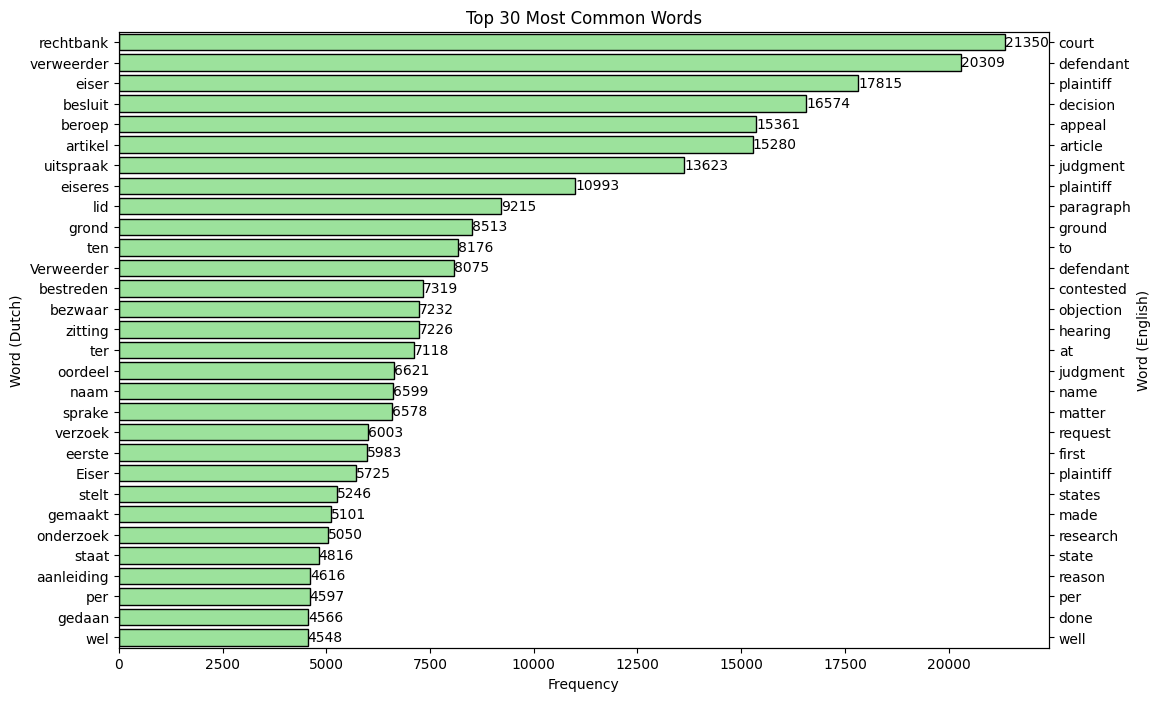

In [24]:
# Convert the most common words to a DataFrame for plotting
most_common_words_df = pd.DataFrame(analysis_results["Most common words"], columns=['Word', 'Frequency'])

# Convert the most common bigrams to a DataFrame for plotting
most_common_bigrams_df = pd.DataFrame(analysis_results["Most common bigrams"], columns=['Bigram', 'Frequency'])

# Translate the most common words to English
translations = {
    "rechtbank": "court",
    "verweerder": "defendant",
    "eiser": "plaintiff",
    "besluit": "decision",
    "beroep": "appeal",
    "artikel": "article",
    "uitspraak": "judgment",
    "eiseres": "plaintiff",
    "lid": "subsection",
    "grond": "ground",
    "ten": "to",
    "Verweerder": "defendant",
    "bestreden": "contested",
    "bezwaar": "objection",
    "zitting": "hearing",
    "ter": "at",
    "oordeel": "judgment",
    "naam": "name",
    "sprake": "matter",
    "verzoek": "request",
    "eerste": "first",
    "Eiser": "plaintiff",
    "stelt": "states",
    "gemaakt": "made",
    "onderzoek": "research",
    "staat": "state",
    "aanleiding": "reason",
    "per": "per",
    "gedaan": "done",
    "wel": "well"
}

translations_bigrams = {
    "bestreden besluit": "contested decision",
    "eerste lid": "first subsection",
    "ter zitting": "at hearing",
    "hoger beroep": "higher appeal",
    "grond artikel": "ground article",
    "beroep ingesteld": "appeal lodged",
    "artikel eerste": "article first",
    "ECLI NL": "ECLI NL",
    "primaire besluit": "primary decision",
    "uitspraak gedaan": "judgment given",
    "besluit verweerder": "decision defendant",
    "bedoeld artikel": "intended article",
    "ten onrechte": "wrongly",
    "ten aanzien": "regarding",
    "voorlopige voorziening": "provisional measure",
    "ongegrond verklaard": "declared unfounded",
    "bezwaar beroep": "objection appeal",
    "oordeel rechtbank": "judgment court",
    "beroep ongegrond": "appeal unfounded",
    "tweede lid": "second member",
    "opgevraagde persoon": "summoned person",
    "Beslissing rechtbank": "court decision",
    "rechtbank oordeel": "court judgment",
    "ten grondslag": "at basis",
    "verklaart beroep": "declares appeal",
    "laten vertegenwoordigen": "let represent",
    "naam kind": "name child",
    "rechtbank verklaart": "court declares",
    "onderzoek ter": "investigation at",
    "zes weken": "six weeks"
}

# Add translations to the DataFrame
most_common_words_df['English'] = most_common_words_df['Word'].map(translations)
# Add translations to the DataFrame
most_common_bigrams_df['English'] = most_common_bigrams_df['Bigram'].map(translations_bigrams)

# Plot the most common words
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Frequency', y='Word', data=most_common_words_df, color='lightgreen', edgecolor='black')
plt.title('Top 30 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word (Dutch)')

# Add translations as a secondary y-axis
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())  # Ensure the y-axes are aligned
ax2.set_yticks(ax.get_yticks())  # Set the ticks to be the same
ax2.set_yticklabels(most_common_words_df['English'])  # Set the tick labels to be the English translations
ax2.set_ylabel('Word (English)')

# Add value labels on the bars
for index, row in most_common_words_df.iterrows():
    ax.text(row.Frequency, index, f'{row.Frequency}', color='black', ha="left", va="center")

plt.show()

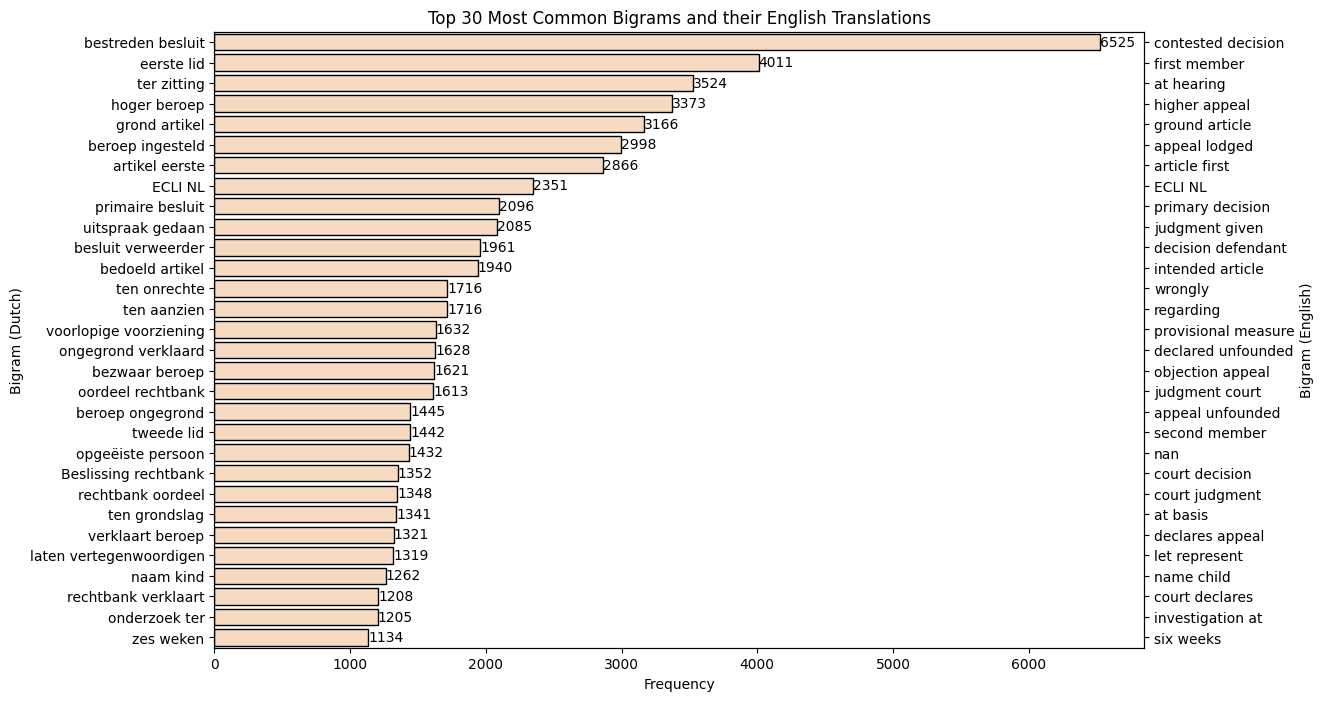

In [25]:
# Plot the most common bigrams
plt.figure(figsize=(12, 8))
ax_bigrams = sns.barplot(x='Frequency', y='Bigram', data=most_common_bigrams_df, color='peachpuff', edgecolor='black')
plt.title('Top 30 Most Common Bigrams and their English Translations')
plt.xlabel('Frequency')
plt.ylabel('Bigram (Dutch)')

# Add a black outline to the bars
for patch in ax_bigrams.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

# Add translations as a secondary y-axis
ax2_bigrams = ax_bigrams.twinx()
ax2_bigrams.set_ylim(ax_bigrams.get_ylim())  # Ensure the y-axes are aligned
ax2_bigrams.set_yticks(ax_bigrams.get_yticks())  # Set the ticks to be the same
ax2_bigrams.set_yticklabels(most_common_bigrams_df['English'])  # Set the tick labels to be the English translations
ax2_bigrams.set_ylabel('Bigram (English)')

# Add value labels on the bars
for index, row in most_common_bigrams_df.iterrows():
    ax_bigrams.text(row.Frequency, index, f'{row.Frequency}', color='black', ha="left", va="center")

plt.show()

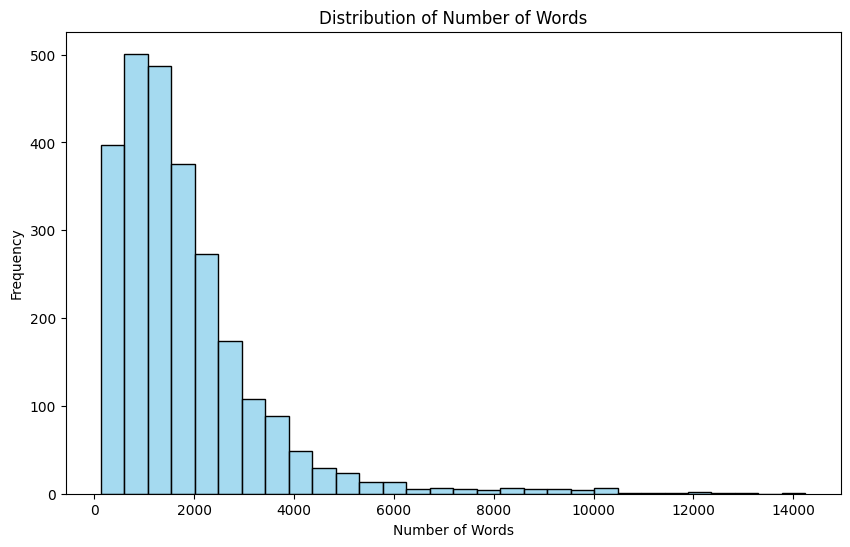

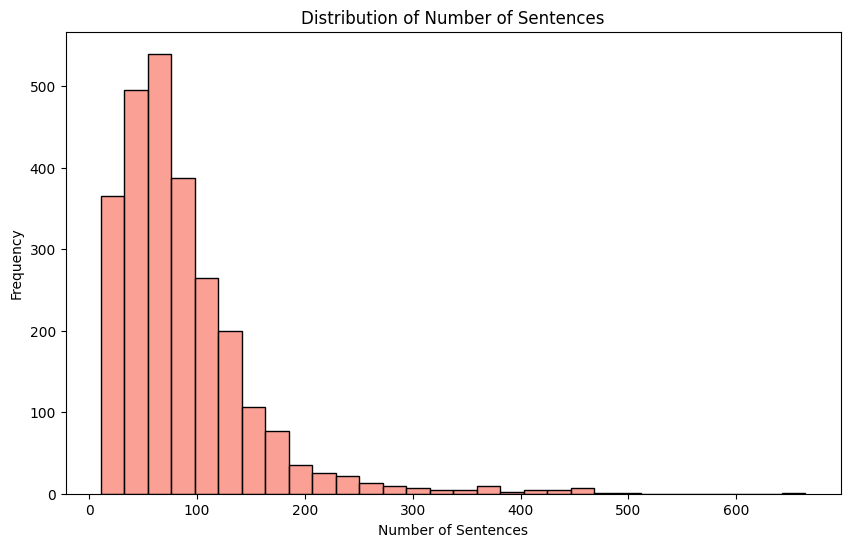

In [ ]:
# Create a DataFrame for number of words and sentences distribution
distribution_df = df[['NumSentences', 'NumWords']].melt(var_name='Metric', value_name='Count')

# Plot the distribution of number of words
plt.figure(figsize=(10, 6))
sns.histplot(df['NumWords'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of number of sentences
plt.figure(figsize=(10, 6))
sns.histplot(df['NumSentences'], bins=30, kde=False, color='salmon')
plt.title('Distribution of Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()